In [1]:
# Data Preparation

import pandas as pd
import numpy as np
# Load the data
df = pd.read_csv('all_datasets_cleaned.csv', low_memory= False)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Columns: 214 entries, it to Seats
dtypes: float64(8), int64(9), object(197)
memory usage: 12.3+ MB


### Train-Test Split For Cleaned Dataset 

In [3]:
from sklearn.model_selection import train_test_split

# Assuming df is the preprocessed DataFrame
X = df[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName','City','mileage', 'Seats']]
y = df['price']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the train and test datasets
print("X_train length:", len(X_train))
print("X_test length:", len(X_test))
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train length: 6008
X_test length: 1503
y_train length: 6008
y_test length: 1503


### Linear Regression with Cross-Validation and Regularization (Grid Search for Ridge and Lasso)

C:\Users\Siva\AppData\Local\Temp\ipykernel_20356\9149069.py:10: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\all_datasets_cleaned.csv')


Linear Regression CV Mean MSE: 42911933968.48537
Linear Regression - MSE: 48351470014.4159, MAE: 158699.2028734054, R²: 0.6239615938705361


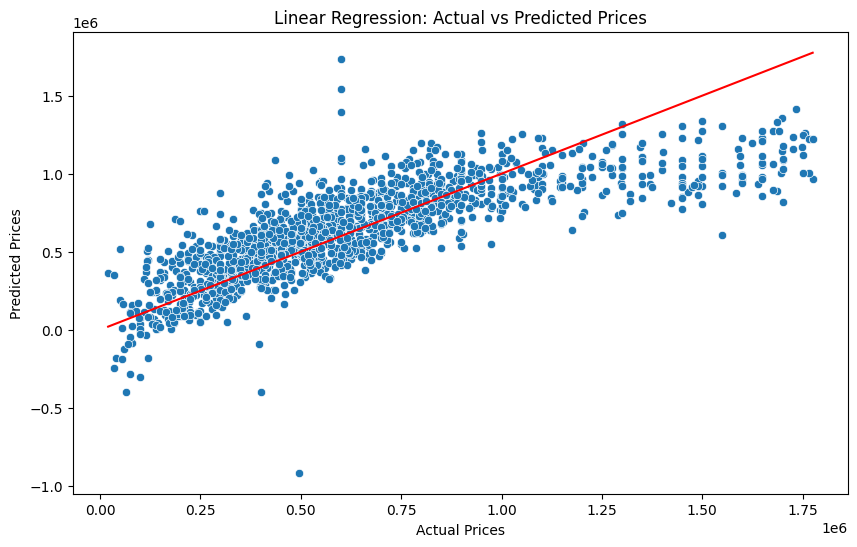

Best Ridge Alpha: {'alpha': 1}
Best Lasso Alpha: {'alpha': 100}


<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\all_datasets_cleaned.csv')

# Define features and target
X = df[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats']]
y = df['price']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')
plt.savefig('linear_regression_actual_vs_predicted.png')


### Gradient Boosting with Cross-Validation and Hyperparameter Tuning (Random Search)

Gradient Boosting CV Mean MSE: 22155057770.53112
Gradient Boosting - MSE: 25097389873.630695, MAE: 108576.23916320053, R²: 0.8048129150307934


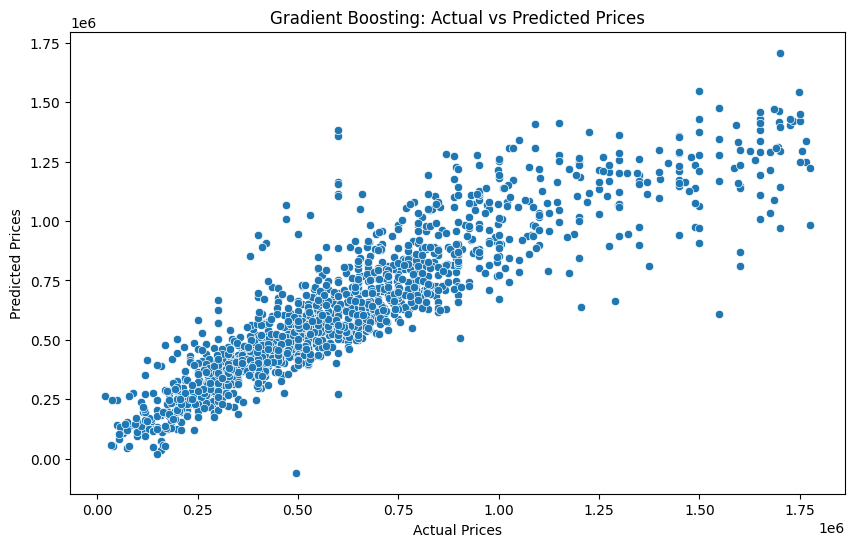

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05}


<Figure size 640x480 with 0 Axes>

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')

plt.savefig('Gradient_Boosting_actual_vs_predicted.png')


### Decision Tree with Cross-Validation and Hyperparameter Tuning (Grid Search)

Decision Tree CV Mean MSE: 43201186286.646324
Decision Tree - MSE: 45922060695.05516, MAE: 152517.0616255033, R²: 0.6428555635474891


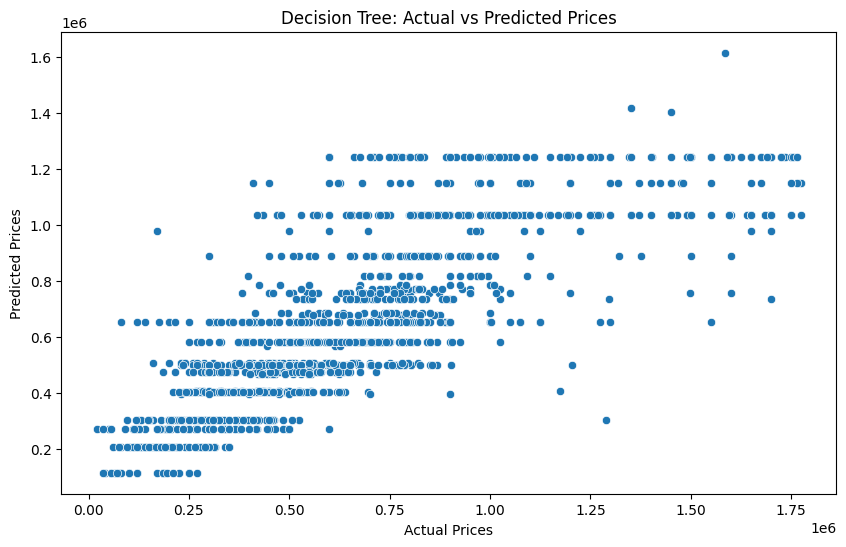

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')

plt.savefig('Decision_Tree_actual_vs_predicted.png')


### Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

Random Forest CV Mean MSE: 15653428899.590662
Random Forest - MSE: 16375013605.622261, MAE: 78405.33242562495, R²: 0.8726484631228255


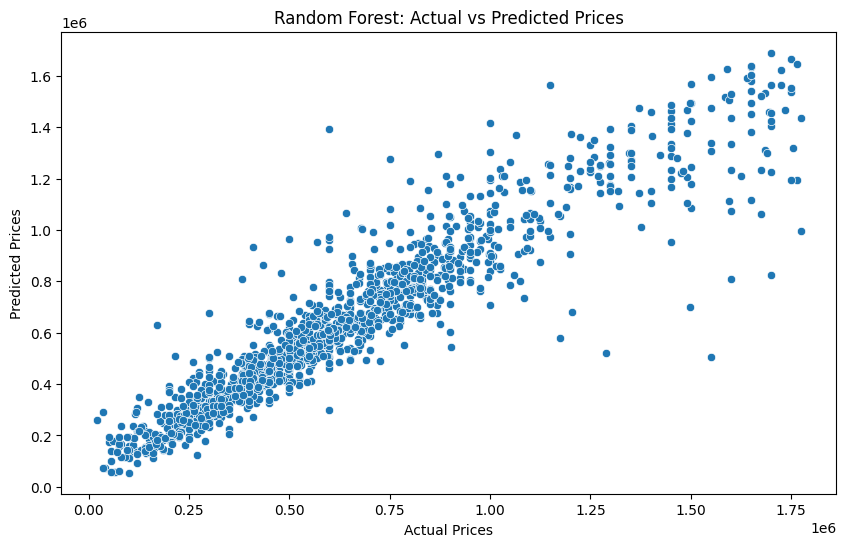

Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')

plt.savefig('Random_Forest_actual_vs_predicted.png')


## XGBoost

XGBoost CV Mean MSE: 13925474907.342052
XGBoost - MSE: 13567183383.198977, MAE: 72525.72371403028, R²: 0.8944854827875305


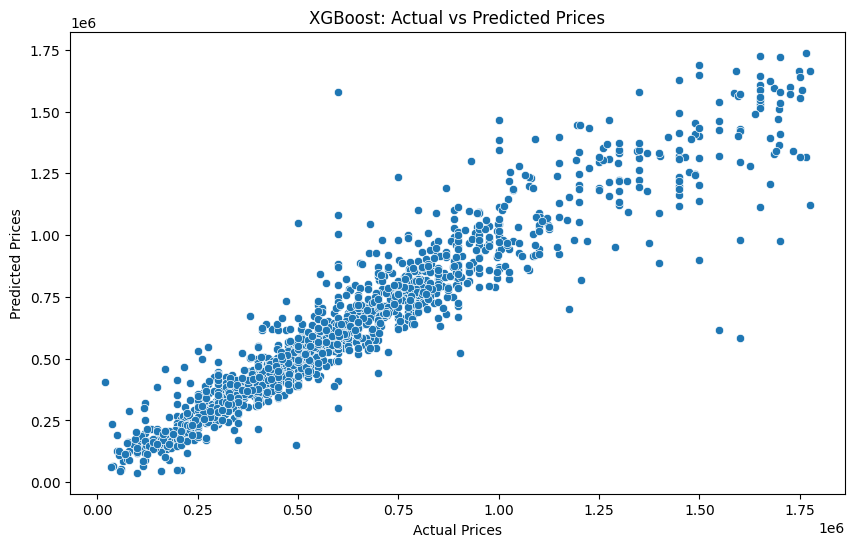

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.6}


<Figure size 640x480 with 0 Axes>

In [8]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training with XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

# Cross-Validation
xgboost_cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'XGBoost CV Mean MSE: {-xgboost_cv_scores.mean()}')

# Model Prediction
y_pred_xgboost = xgboost_model.predict(X_test)

# Model Evaluation
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f'XGBoost - MSE: {mse_xgboost}, MAE: {mae_xgboost}, R²: {r2_xgboost}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgboost)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
xgboost_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgboost_random = RandomizedSearchCV(xgboost_model, xgboost_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgboost_random.fit(X_train, y_train)

print(f'Best XGBoost Params: {xgboost_random.best_params_}')

plt.savefig('XGBoost_actual_vs_predicted.png')


## CatBoost

CatBoost CV Mean MSE: 11569166777.883755
CatBoost - MSE: 12268354898.489334, MAE: 67929.77295955025, R²: 0.9045867143132761


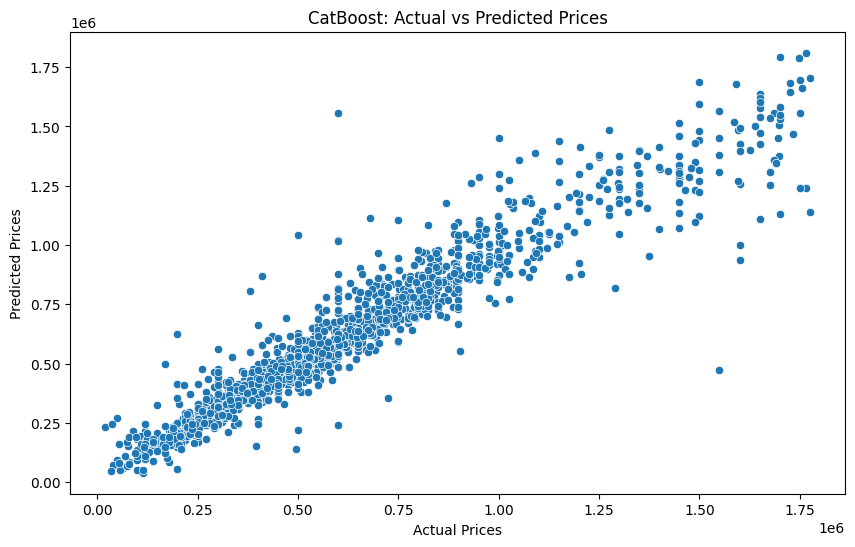

Best CatBoost Params: {'learning_rate': 0.2, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 6, 'border_count': 128}


<Figure size 640x480 with 0 Axes>

In [9]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Model Training with CatBoost
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Cross-Validation
catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'CatBoost CV Mean MSE: {-catboost_cv_scores.mean()}')

# Model Prediction
y_pred_catboost = catboost_model.predict(X_test)

# Model Evaluation
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f'CatBoost - MSE: {mse_catboost}, MAE: {mae_catboost}, R²: {r2_catboost}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_catboost)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
catboost_params = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 50, 128]
}
catboost_random = RandomizedSearchCV(catboost_model, catboost_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
catboost_random.fit(X_train, y_train)

print(f'Best CatBoost Params: {catboost_random.best_params_}')

plt.savefig('CatBoost_actual_vs_predicted.png')


### Summary and Comparison Table

In [10]:
import pandas as pd

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest', 'XG Boost', 'CAT Boost'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf, mse_xgboost, mse_catboost],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf, mae_xgboost, mae_catboost],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf, r2_xgboost, r2_catboost]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")



Model Comparison Table:
               Model           MSE            MAE        R²
0  Linear Regression  4.835147e+10  158699.202873  0.623962
1  Gradient Boosting  2.509739e+10  108576.239163  0.804813
2      Decision Tree  4.592206e+10  152517.061626  0.642856
3      Random Forest  1.637501e+10   78405.332426  0.872648
4           XG Boost  1.356718e+10   72525.723714  0.894485
5          CAT Boost  1.226835e+10   67929.772960  0.904587

Best Model Summary:
Best Model: CAT Boost
MSE: 12268354898.489334
MAE: 67929.77295955025
R²: 0.9045867143132761


### Finalized Model Training :

C:\Users\Siva\AppData\Local\Temp\ipykernel_20356\2214251363.py:13: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\all_datasets_cleaned.csv')
C:\Users\Siva\AppData\Local\Temp\ipykernel_20356\2214251363.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_older[feature] = encoder.transform(X_older[feature].astype(str))
C:\Users\Siva\AppData\Local\Temp\ipykernel_20356\2214251363.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

0:	learn: 315607.9991358	total: 49.1ms	remaining: 1m 13s
1:	learn: 281870.0750421	total: 99.9ms	remaining: 1m 14s
2:	learn: 254341.5346070	total: 149ms	remaining: 1m 14s
3:	learn: 233514.6675340	total: 204ms	remaining: 1m 16s
4:	learn: 215603.8033372	total: 250ms	remaining: 1m 14s
5:	learn: 202131.3639172	total: 286ms	remaining: 1m 11s
6:	learn: 191540.3017209	total: 318ms	remaining: 1m 7s
7:	learn: 182024.9212334	total: 349ms	remaining: 1m 5s
8:	learn: 175370.6797355	total: 380ms	remaining: 1m 2s
9:	learn: 169183.6824823	total: 410ms	remaining: 1m 1s
10:	learn: 165255.8299374	total: 441ms	remaining: 59.7s
11:	learn: 161846.3720623	total: 473ms	remaining: 58.6s
12:	learn: 157988.7693989	total: 505ms	remaining: 57.8s
13:	learn: 154926.0550555	total: 538ms	remaining: 57.1s
14:	learn: 152765.3993456	total: 569ms	remaining: 56.4s
15:	learn: 150884.3381309	total: 600ms	remaining: 55.7s
16:	learn: 148283.0592178	total: 632ms	remaining: 55.2s
17:	learn: 146830.1009750	total: 663ms	remaining: 

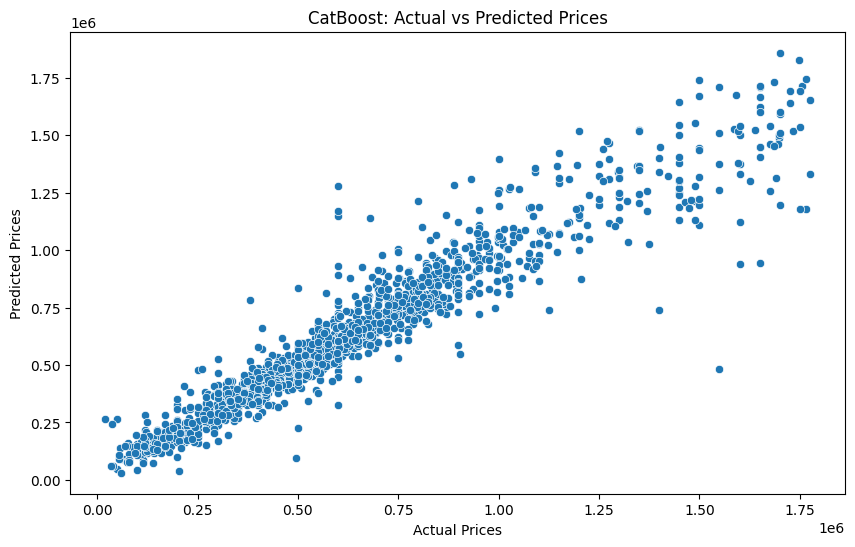

Model training complete. Model saved as 'car_price_prediction_model.pkl'.


In [12]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load dataset
data = pd.read_csv('C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\all_datasets_cleaned.csv')

# Load preprocessing steps
label_encoders = joblib.load('C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\label_encoders.pkl')
scalers = joblib.load('C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\scalers.pkl')

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['mileage'] / data['car_age']

# Define features and target
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price']

# Combine training and older car datasets for Label Encoding
combined_data = pd.concat([X_train, X_older])

# Apply label encoding across combined dataset to ensure all values are captured
for feature in ['transmission', 'oem', 'model', 'variantName', 'City']:
    encoder = LabelEncoder()
    combined_data[feature] = combined_data[feature].astype(str)
    encoder.fit(combined_data[feature])  # Fit on the combined dataset
    
    # Transform the training, test, and older cars datasets
    X_train[feature] = encoder.transform(X_train[feature].astype(str))
    X_test[feature] = encoder.transform(X_test[feature].astype(str))
    X_older[feature] = encoder.transform(X_older[feature].astype(str))

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(random_state=42, cat_features=['transmission', 'oem', 'model', 'variantName', 'City'])

# Parameter grid for RandomizedSearchCV
param_dist = {
    'iterations': [1500],
    'depth': [6],
    'learning_rate': [0.2],
    'l2_leaf_reg': [5],
    'border_count': [128],
}

# RandomizedSearchCV
start_time = time.time()
catboost_random = RandomizedSearchCV(catboost_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
catboost_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_catboost_model = catboost_random.best_estimator_

# Cross-Validation
catboost_cv_scores = cross_val_score(best_catboost_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'CatBoost CV Mean MSE: {-catboost_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_catboost = best_catboost_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f'CatBoost - MSE: {mse_catboost}, MAE: {mae_catboost}, R²: {r2_catboost}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Predict on older cars
y_pred_older = best_catboost_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_catboost)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Save the trained model
joblib.dump(best_catboost_model, 'C:\\Users\\Siva\\Capstone Projects\\Car Dheko\\Datasets\\car_price_prediction_model.pkl')

print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")
